In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (16, 6)})

**IMPORT DATA FROM CLEAN CSV**

In [14]:
pd.set_option('display.max_columns', None)
shark_attacks = pd.read_csv("../data/clean_attacks.csv", encoding="latin1")
shark_attacks = pd.DataFrame(shark_attacks)
shark_attacks.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,clean_time,clean_age,clean_year,clean_sex,clean_activity
1929,2001.07.26,26-Jul-2001,2001.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",NaN,female,F,NaN,Survived,N,NaN,NaN,SAF,Unknown,Unknown,2001,F,Unknown
4593,1946.10.14,14-Oct-1946,1946.0,Unprovoked,AUSTRALIA,New South Wales,"MarkÃ¯Â¿Â½s Point, Swan Bay, Lake Macquarie",Swimming,Douglas Blackmore,M,15,Left leg lacerated,N,NaN,NaN,"G.P. Whitley (1951), p.193; V.M. Coppleson (19...",Unknown,15,1946,M,Swimming
463,2014.12.29.b,29-Dec-2014,2014.0,Unprovoked,AUSTRALIA,New South Wales,Bherwerre Beach,Surfing,Jeff Brown,NaN,NaN,Lacerations to both feet,N,Morning,2 m shark,"South Coast Register, 12/29/2014",Morning,Unknown,2014,Unknown,Surfing


**VISUALIZATION**

A Century of Shark Attacks: Tracing the Evolution

In [50]:
def classify_years_by_range(year):
    """
    This function receives a string and it looks 
    """
    year = int(year)
    return ''

shark_attacks_ = shark_attacks[shark_attacks['clean_year'] != 'Unknown']
print("Max is: ", max(shark_attacks_['clean_year']))
print("Min is: ", min(shark_attacks_['clean_year']))


Max is:  2018
Min is:  1543


C:\Users\noemi\AppData\Local\Temp\ipykernel_10424\1092664249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_['clean_year'] = shark_attacks_['clean_year'].astype(int)


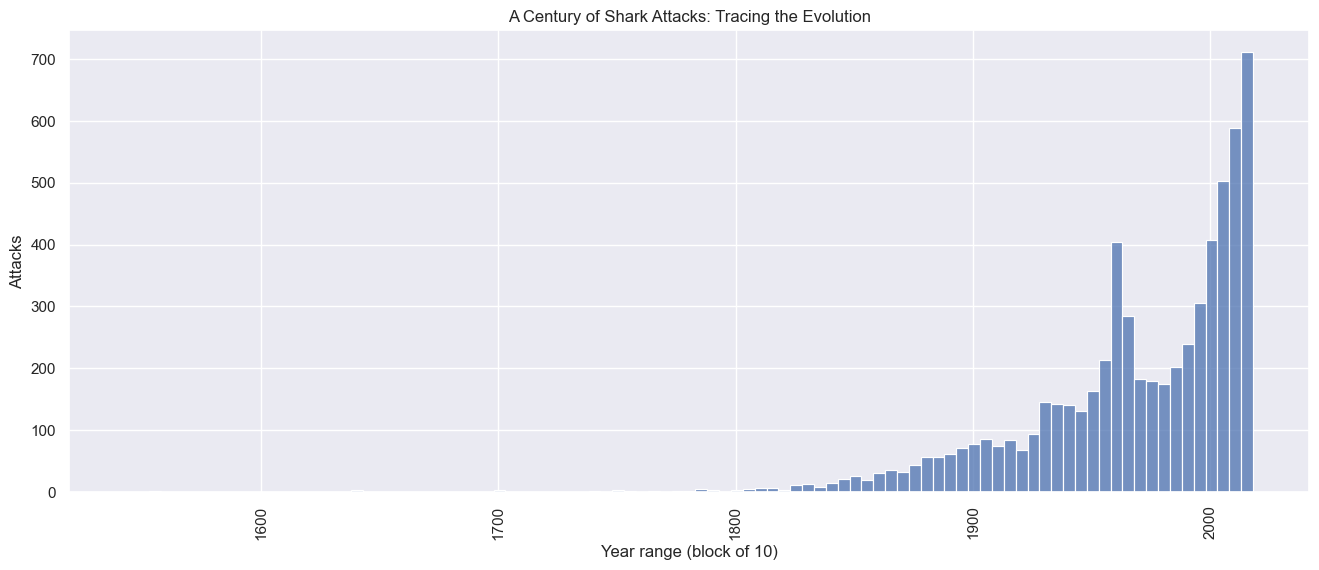

In [56]:
shark_attacks_ = shark_attacks[shark_attacks['clean_year'] != 'Unknown']
shark_attacks_['clean_year'] = shark_attacks_['clean_year'].astype(int)
bins = range(int(shark_attacks_['clean_year'].min()), int(shark_attacks_['clean_year'].max()) + 5, 5)
sns.histplot(data=shark_attacks_, x='clean_year', bins=bins)
plt.title('A Century of Shark Attacks: Tracing the Evolution')
plt.xlabel('Year range (block of 10)')
plt.ylabel('Attacks')
plt.xticks(rotation=90)
plt.show()

#sns.histplot(x='clean_year', data=shark_attacks)